An Introduction to SunPy! 
=====================

The [`sunpy`](https://sunpy.org
) Python package is a community-developed, free, and open-source solar data analysis environment for Python!  

sunpy provides the core functionality and tools to analyze solar data with Python.

In this notebook the main components and functionality of sunpy will be demonstrated. 
An overview is:

1. Introduction to Fido for querying and downloading solar data
2. Coordinates in sunpy 
3. Data Containers - TimeSeries and Map<img src="https://raw.githubusercontent.com/sunpy/sunpy.org/main/_static/img/sunpy_icon.svg" alt="logo" width="100" align="right"/>

In [1]:
from sunpy.net import Fido, attrs as a 
from sunpy.coordinates import frames, get_body_heliographic_stonyhurst, get_horizons_coord
import sunpy.timeseries
import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE, GOES_XRS_TIMESERIES
from sunpy.time import parse_time

from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt 
import numpy as np 

1.Searching and Downloading Data
===========================



## Overview of sunpy's Fido Unified Downloader


* [`Fido`](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#fido-guide) is sunpy's interface for searching and downloading solar physics data.

* It offers a unified interface for searching and fetching data irrespective of the underlying client or webservice from where the data is obtained.

* Offers a way to search and accesses multiple instruments and all available data providers in a single query.

* It supplies a single, easy, consistent and *extendable* way to get most forms of solar physics data the community need 

Fido offers access to data available through:

 * **VSO**
 * **JSOC** (through `drms`)
 * **Individual data providers** from web accessible sources (http, ftp, etc)
 * **HEK**
 * **HELIO**

In [2]:
Fido

Client,Description
EVEClient,Provides access to Level 0C Extreme ultraviolet Variability Experiment (EVE) data.
GBMClient,Provides access to data from the Gamma-Ray Burst Monitor (GBM) instrument on board the Fermi satellite.
XRSClient,Provides access to the GOES XRS fits files archive.
SUVIClient,Provides access to data from the GOES Solar Ultraviolet Imager (SUVI).
GONGClient,Provides access to the Magnetogram products of NSO-GONG synoptic Maps.
...,...
NoRHClient,Provides access to the Nobeyama RadioHeliograph (NoRH) averaged correlation time series data.
RHESSIClient,Provides access to the RHESSI observing summary time series data.
HEKClient,Provides access to the Heliophysics Event Knowledgebase (HEK).
HECClient,Provides access to the HELIO webservices.


Sunpy uses specified *attributes* to search for data using Fido.
Different clients and provides will have client-specific attributes, but the core attributes are:

* `a.Time`
* `a.Instrument`
* `a.Wavelength` 

lets construct a search query to search for data from the Atmospheric Imaging Assembly (AIA) onboard the Solar Dynamics Observatory

In [3]:
result = Fido.search(a.Time("2021-05-23 11:00", "2021-05-23 11:05"), 
                     a.Instrument("AIA"))

In [4]:
result

Start Time,End Time,Source,Instrument,Wavelength [2],Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
object,object,str3,str3,float64,str4,str9,str6,str4,str4,str8,float64,str57
2021-05-23 11:00:00.000,2021-05-23 11:00:01.000,SDO,AIA,335.0 .. 335.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-05-23 11:00:04.000,2021-05-23 11:00:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:00:05.000,2021-05-23 11:00:06.000,SDO,AIA,304.0 .. 304.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.902 exposure] [100.00 percentd]"
2021-05-23 11:00:05.000,2021-05-23 11:00:06.000,SDO,AIA,4500.0 .. 4500.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [0.300 exposure] [100.00 percentd]"
2021-05-23 11:00:06.000,2021-05-23 11:00:07.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-05-23 11:00:09.000,2021-05-23 11:00:10.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:00:09.000,2021-05-23 11:00:10.000,SDO,AIA,211.0 .. 211.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-05-23 11:00:11.000,2021-05-23 11:00:12.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"


To search for certain wavelengths, we need to specify the input as an [`astropy.Quantity`](https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity) which is a the combination of a value and an associated unit. This is something is universal in the sunpy stack - that every physical input/output is a `Quantity`.

In [5]:
result = Fido.search(a.Time("2021-05-23 11:00", "2021-05-23 11:05"), 
                     a.Instrument("AIA"), 
                     a.Wavelength(171*u.angstrom))

In [6]:
result

Start Time,End Time,Source,Instrument,Wavelength [2],Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
object,object,str3,str3,float64,str4,str9,str6,str4,str4,str8,float64,str57
2021-05-23 11:00:09.000,2021-05-23 11:00:10.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:00:21.000,2021-05-23 11:00:22.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:00:33.000,2021-05-23 11:00:34.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:00:45.000,2021-05-23 11:00:46.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:00:57.000,2021-05-23 11:00:58.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:01:09.000,2021-05-23 11:01:10.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:01:21.000,2021-05-23 11:01:22.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"
2021-05-23 11:01:33.000,2021-05-23 11:01:34.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"


In [7]:
result[0, 0]

Start Time,End Time,Source,Instrument,Wavelength [2],Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info,fileid
,,,,Angstrom,,,,,,,Mibyte,,
object,object,str3,str3,float64,str4,str9,str6,str4,str4,str8,float64,str57,str24
2021-05-23 11:00:09.000,2021-05-23 11:00:10.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]",aia__lev1:171:1400842847


Now we can show how data that is queried above can be downloaded. Once the data you have searched for (and filtered etc) is constructed into a query using `Fido.search`, you can then easily download them using `Fido.fetch`.

The data is downloaded via asynchronous and parallel download streams (via `parfive`), and also allows for failed data downloads to be recognized so that files can be re-requested if not downloaded. 

Lets just download the first query result for brevity.

In [8]:
files = Fido.fetch(result[0, 0])

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [9]:
files

['/Users/laurahayes/sunpy/data/aia_lev1_171a_2021_05_23t11_00_09_35z_image_lev1.fits']

2.Coordinates
===========

SunPy uses astropy.coordinates to represent points in physical space. This applies to both points in 3D space and projected coordinates in images.

The `sunpy.coordinates` sub-package contains:

* A robust framework for working with solar-physics coordinate systems
* Functions to obtain the locations of solar-system bodies (`sunpy.coordinates.ephemeris`)
* Functions to calculate Sun-specific coordinate information (`sunpy.coordinates.sun`)

A SkyCoord object to represent a point on the Sun can then be created:

In [10]:
c = SkyCoord(70*u.deg, -30*u.deg, obstime="2017-08-01",
             frame=frames.HeliographicStonyhurst)

c

<SkyCoord (HeliographicStonyhurst: obstime=2017-08-01T00:00:00.000, rsun=695700.0 km): (lon, lat) in deg
    (70., -30.)>

We can then transform this coordinate to the any defined coordinate frame defined in astropy or sunpy. Lets transform it to the Helioprojective frame (which is observer-based)

In [11]:
c.transform_to(frames.Helioprojective(observer="earth"))

<SkyCoord (Helioprojective: obstime=2017-08-01T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (769.96270814, -498.89715922, 1.51668773e+08)>

We can also convert these coordinates to astrophysical frames defined in astropy, e.g. ICRS

In [12]:
c.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km)
    (49.84856512, 0.05394699, 1417743.94689472)>

2 . Data Containers
=============

SunPy provides core data type classes that are designed to provide a consistent interface across data types (timeseries and images) as well as data sources from numerous instruments and observations. They handle all of the manipulation necessary to read data in from mission-specific files. The two main datatypes in SunPy are the `TimeSeries` and `Map` classes.

## TimeSeries

The structure of a [`TimeSeries`](https://docs.sunpy.org/en/stable/guide/data_types/timeseries.html) consists of times and measurements and the underlying structure is that of a pandas.DataFrame. SunPy TimeSeries supports time-series data from a wide range of solar-focused instruments. TimeSeries from different instruments are created in the sunpy.timeseries.TimeSeries factory.


Lets create a timeseries from out sample data which is X-ray flux from the GOES X-ray Sensor Data

In [13]:
GOES_XRS_TIMESERIES

'/Users/laurahayes/Library/Application Support/sunpy/go1520110607.fits'

TimeSeries which will automatically detect the instrument source when passed supported files

In [14]:
xrs_ts = sunpy.timeseries.TimeSeries(GOES_XRS_TIMESERIES)

We can plot the data, and inspect the data with .peek()

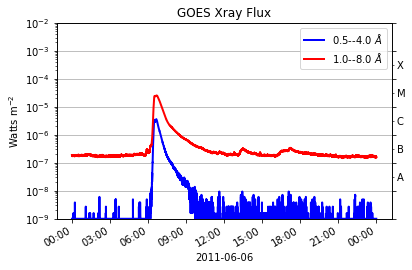

In [15]:
xrs_ts.peek()

In [16]:
xrs_ts.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:59.961999 | xrsa            | simple: True                                      |
|            to             | xrsb            | bitpix: 8                                         |
|2011-06-07T23:59:57.631999 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | date: 26/06/2012                                  |
|                           |                 | numext: 3                                         |
|                           |                 | telescop: GOES 15                                 |


In [17]:
xrs_ts.units

OrderedDict([('xrsa', Unit("W / m2")), ('xrsb', Unit("W / m2"))])

In [18]:
xrs_ts.quantity('xrsa')

<Quantity [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09] W / m2>

In [19]:
xrs_ts.to_dataframe()

,xrsa,xrsb
2011-06-06 23:59:59.961999893,1.000000e-09,1.887100e-07
2011-06-07 00:00:02.008999944,1.000000e-09,1.834600e-07
2011-06-07 00:00:04.058999896,1.000000e-09,1.860900e-07
2011-06-07 00:00:06.104999900,1.000000e-09,1.808400e-07
2011-06-07 00:00:08.151999950,1.000000e-09,1.860900e-07
...,...,...
2011-06-07 23:59:49.441999912,1.000000e-09,1.624800e-07
2011-06-07 23:59:51.488999844,1.000000e-09,1.624800e-07
2011-06-07 23:59:53.538999915,1.000000e-09,1.598500e-07
2011-06-07 23:59:55.584999919,1.000000e-09,1.624800e-07


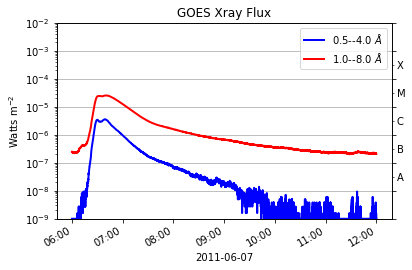

In [20]:
xrs_ts.truncate("2011-06-07 06:00", "2011-06-07 12:00").peek()

## Map

The sunpy [`Map`](https://docs.sunpy.org/en/stable/guide/data_types/maps.html) class provides the data type structure to store 2-dimensional data associated with a coordinate system.  This allows users to store and manipulate images of the Sun and the heliosphere

Maps from all instruments are created using the `sunpy.map.Map` 'factory'. This class takes a wide variety of map-like inputs, for one or more maps and returns you one or many maps. All maps, irrespective of the instrument, behave the same and expose the same functions and properties, however, depending on the instrument different metadata might be read or corrections made.

In [21]:
aia171 = sunpy.map.Map(AIA_171_IMAGE)

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2011-06-07 06:33:02
Exposure Time,0.234256 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.402792 2.402792] arcsec / pix
Reference Pixel,[511.5 511.5] pix

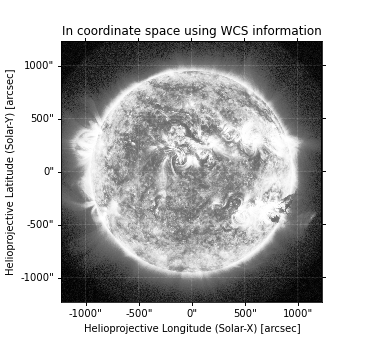
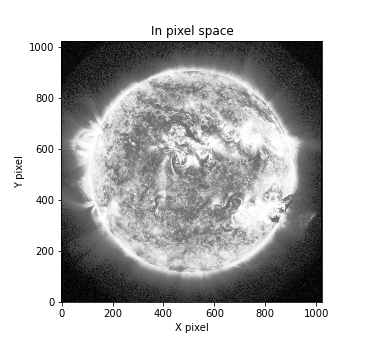
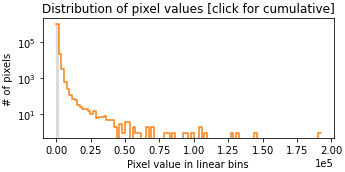
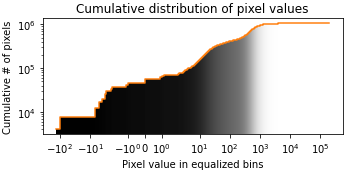

In [22]:
aia171

In [23]:
aia171.unit

Unit("ct")

`Map` has a set of attributes which give access to common metadata, which provides a consistent interface for different instruments, lets look at some of these here

In [24]:
aia171.instrument

'AIA 3'

In [25]:
aia171.wavelength

<Quantity 171. Angstrom>

The Map also contains the coordinate specific information to the Map

In [26]:
aia171.coordinate_frame

<Helioprojective Frame (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>)>

In [27]:
aia171.observer_coordinate

<SkyCoord (HeliographicStonyhurst: obstime=2011-06-07T06:33:02.770, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>

In [28]:
aia171.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  
CRVAL : 0.00089530541880571  0.00038493926472939  
CRPIX : 512.5  512.5  
PC1_1 PC1_2  : 0.99999706448085  0.0024230207763071  
PC2_1 PC2_2  : -0.0024230207763071  0.99999706448085  
CDELT : 0.00066744222222222  0.00066744222222222  
NAXIS : 0  0

### Plotting a Map

SunPy map uses the [`astropy.visualization.wcsaxes`](https://docs.astropy.org/en/stable/visualization/wcsaxes/index.html#module-astropy.visualization.wcsaxes) module to represent world coordinates. 

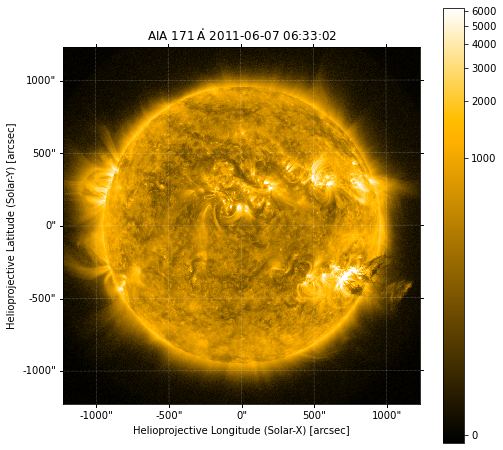

In [29]:
fig = plt.figure(figsize=(8, 8))
im = aia171.plot(clip_interval=[1, 99.9]*u.percent)
fig.colorbar(im)

We can take advantage of WCS Axes to overplot coordinates ontop of this map

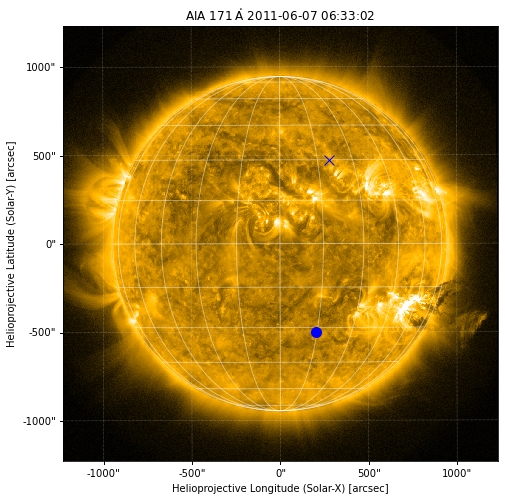

In [30]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection=aia171)
aia171.plot(axes=ax, clip_interval=[1, 99.9]*u.percent)

aia171.draw_grid(axes=ax)

ax.plot_coord(SkyCoord(200*u.arcsec, -500*u.arcsec, frame=aia171.coordinate_frame), marker='o', ms=10, color='b')
ax.plot_coord(SkyCoord(20*u.deg, 30*u.deg, frame='heliographic_stonyhurst'), marker='x', ms=10, color='b')

##  Positions of bodies in space example

`sunpy.coordinates` provides functions to obtain the coordinates of solar-system bodies.  For bodies that are in the current Astropy ephemeris (e.g., planets), you can use [`get_body_heliographic_stonyhurst()`](https://docs.sunpy.org/en/stable/api/sunpy.coordinates.get_body_heliographic_stonyhurst.html)



In [31]:
earth = SkyCoord(get_body_heliographic_stonyhurst('earth',  "2021-06-30"))

For other solar-system bodies (e.g., major man-made spacecraft or comets), you can use [`get_horizons_coord()`](https://docs.sunpy.org/en/stable/api/sunpy.coordinates.get_horizons_coord.html#sunpy.coordinates.get_horizons_coord), which queries JPL HORIZONS:

In [32]:
solo_coord = get_horizons_coord('Solar Orbiter', "2021-06-30")

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


In [33]:
solo_coord

<SkyCoord (HeliographicStonyhurst: obstime=2021-06-30T00:00:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (-100.20317075, -1.67873, 0.91390082)>

In [34]:
solo_coord.heliocentricinertial

<SkyCoord (HeliocentricInertial: obstime=2021-06-30T00:00:00.000): (lon, lat, distance) in (deg, deg, AU)
    (102.01991076, -1.67873, 0.91390082)>

Lets now look for the positions of Solar Orbiter and Parker Solar Probe over a month period and plot their positons.

In [35]:
obstime = parse_time('2021-04-22 04:30')
obstime_seq = obstime + np.arange(-14, 14)*u.day

psp_coord_seq = get_horizons_coord('Parker Solar Probe', obstime_seq)
solo_coord_seq = get_horizons_coord('solo', obstime_seq)

earth = SkyCoord(get_body_heliographic_stonyhurst('earth', obstime_seq))

INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


Text(0.5, 1.0, 'Positions in Heliocentric Inertial (HCI)')

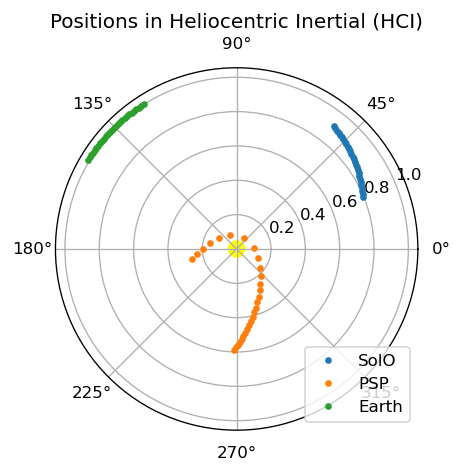

In [36]:
fig = plt.figure(dpi=120)

ax = fig.add_subplot(projection='polar')

ax.plot(solo_coord_seq.heliocentricinertial.lon.to('rad'), solo_coord_seq.heliocentricinertial.distance,
        '.',   label='SolO')

ax.plot(psp_coord_seq.heliocentricinertial.lon.to('rad'), psp_coord_seq.heliocentricinertial.distance,
        '.', label='PSP')

ax.plot(earth.heliocentricinertial.lon.to("rad"), earth.heliocentricinertial.distance, 
        ".", label="Earth")
# plot the Sun
r_unit = u.AU
circle = plt.Circle((0.0, 0.0), (10*u.Rsun).to_value(r_unit),
                    transform=ax.transProjectionAffine + ax.transAxes, color="yellow",
                    alpha=1)
ax.add_artist(circle)

ax.legend(loc='lower right')
ax.set_title('Positions in Heliocentric Inertial (HCI)')